In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Mol
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdqueries

In [2]:
IPythonConsole.drawOptions.addAtomIndices = True

## Scheme 13A: Arene +O -> +N-R

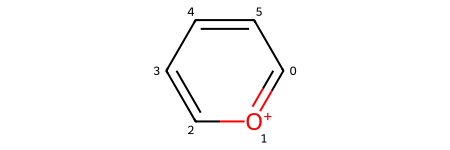

In [3]:
o_arene_sml = "C1=[O+]C=CC=C1"
o_arene = Chem.MolFromSmiles(o_arene_sml)
o_arene

In [4]:
o_aromatic_smarts = "o"
o_aromatic_smarts_mol = Chem.MolFromSmarts(o_aromatic_smarts)
# Check whether o_arene matches SMARTS pattern
o_arene.HasSubstructMatch(o_aromatic_smarts_mol)

True

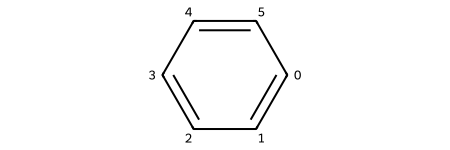

In [5]:
benzene_sml = "c1ccccc1"
benzene = Chem.MolFromSmiles(benzene_sml)
benzene

In [6]:
benzene.HasSubstructMatch(o_aromatic_smarts_mol)

False

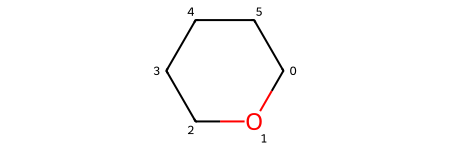

In [7]:
o_alicyclic_sml = "C1OCCCC1"
o_alicyclic = Chem.MolFromSmiles(o_alicyclic_sml)
o_alicyclic

In [8]:
o_alicyclic.HasSubstructMatch(o_aromatic_smarts_mol)

False

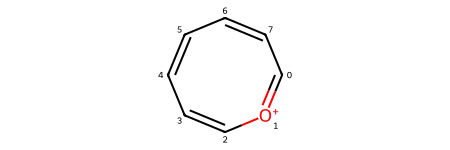

In [9]:
o_arene8_sml = "C1=[O+]C=CC=CC=C1"
o_arene8 = Chem.MolFromSmiles(o_arene8_sml)
o_arene8

In [10]:
o_arene8.HasSubstructMatch(o_aromatic_smarts_mol)

False

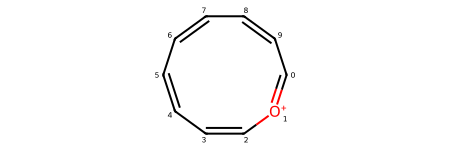

In [11]:
o_arene10_sml = "C1=[O+]C=CC=CC=CC=C1"
o_arene10 = Chem.MolFromSmiles(o_arene10_sml)
o_arene10

In [12]:
o_arene10.HasSubstructMatch(o_aromatic_smarts_mol)

True

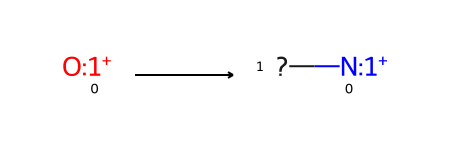

In [13]:
arene_o_to_n = "[o+:1]>>[n+:1]-[R]"
arene_o_to_n_rxn = AllChem.ReactionFromSmarts(arene_o_to_n)
arene_o_to_n_rxn

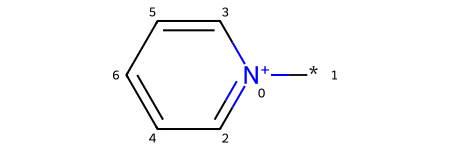

In [14]:
# Run the reaction on the o-arene molecule
o_arene_n = arene_o_to_n_rxn.RunReactants((o_arene,))[0][0]
Chem.SanitizeMol(o_arene_n)
o_arene_n

In [15]:
def run_rxn(rxn_sml, mol):
    rxn = AllChem.ReactionFromSmarts(rxn_sml)
    try:
        products = rxn.RunReactants((mol,))
    except IndexError:
        print("Starting material does not match reaction SMARTS")
        return None
    return products

In [16]:
products = run_rxn(arene_o_to_n, o_arene)

Reactant: 


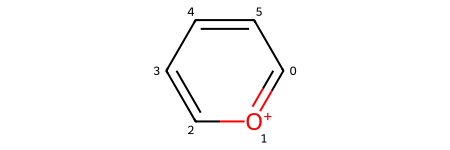

Products:


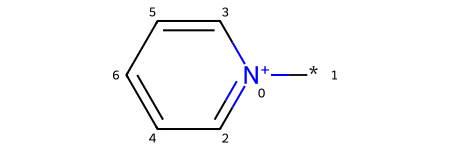

In [17]:
print("Reactant: ")
display(o_arene)
print("Products:")
for product in products:
    display(product[0])

In [18]:
run_rxn(arene_o_to_n, o_arene8)

()

In [19]:
run_rxn(arene_o_to_n, o_arene10)

((<rdkit.Chem.rdchem.Mol at 0x1185fdf50>,),)

### Accomplish the same transformation using RDKit atom substitution

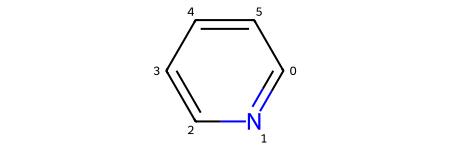

In [20]:
rwm = Chem.RWMol(o_arene)
rwm.ReplaceAtom(1,Chem.Atom(7))
Chem.SanitizeMol(rwm)
rwm

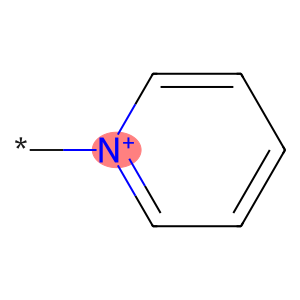

In [21]:
added_atom_idx = rwm.AddAtom(Chem.Atom("*"))
rwm.AddBond(1,added_atom_idx,Chem.BondType.SINGLE)
n_query = rdqueries.AtomNumEqualsQueryAtom(7)
n_at = rwm.GetAtomsMatchingQuery(n_query)[0]
n_at.SetNoImplicit(True)
n_at.SetNumExplicitHs(0)
n_at.SetFormalCharge(1)
Draw.MolToImage(rwm, highlightAtoms=[n_at.GetIdx()])

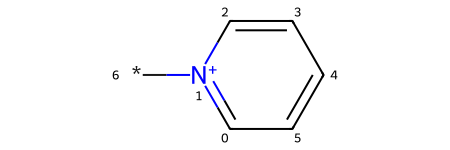

In [22]:
product = rwm.GetMol()
Chem.SanitizeMol(product)
product

## Scheme 13C: Arene n-n -> c=c*

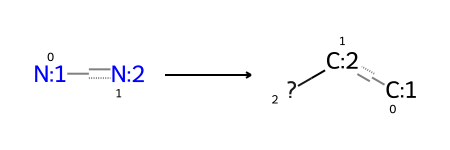

In [23]:
arene_nn_to_ccR = "[n:1][n:2]>>[c:1][c:2]-[R]"
arene_nn_to_ccR_rxn = AllChem.ReactionFromSmarts(arene_nn_to_ccR)
arene_nn_to_ccR_rxn

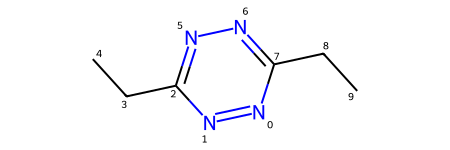

In [24]:
# nn_sml = "N1=NC(*)=NN=C(*)1"
nn_sml = "N1=NC(CC)=NN=C(CC)1"
nn = Chem.MolFromSmiles(nn_sml)
nn

In [25]:
nn_aromatic_smarts = "nn"
nn_aromatic_smarts_mol = Chem.MolFromSmarts(nn_aromatic_smarts)
# Check whether o_arene matches SMARTS pattern
nn_aromatic_smarts_mol.HasSubstructMatch(nn_aromatic_smarts_mol)

True

In [26]:
products_arene_nn_to_ccR = run_rxn(arene_nn_to_ccR, nn)

Reactant: 


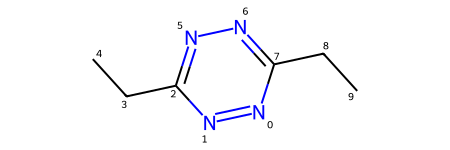

Products:


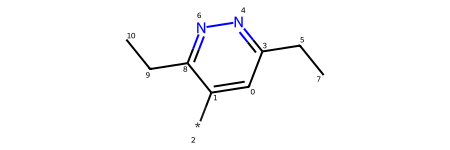

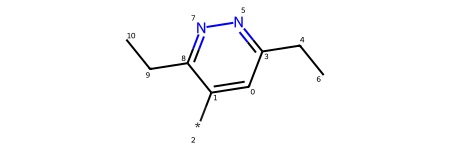

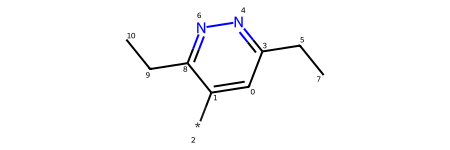

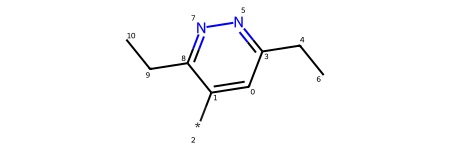

In [27]:
print("Reactant: ")
display(nn)
print("Products:")
for product in products_arene_nn_to_ccR:
    display(product[0])

TODO: Make all the reactant SMARTS patterns for 13Di include the whole tricycle, not just SO2

## Scheme 13Di left: Tricyclic SO2 -> N-Ph-R

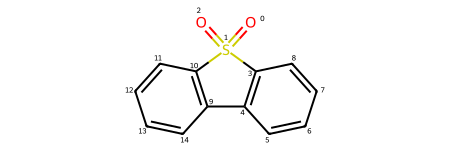

In [28]:
tricyclic_SO2 = "O=S1(=O)C2=C(C=CC=C2)C2=C1C=CC=C2"
tricyclic_SO2_mol = Chem.MolFromSmiles(tricyclic_SO2)
tricyclic_SO2_mol

In [29]:
tricyclic_SO2_N_Ph_R = "[O:6]=[S:7]=[0]>>[*:8][c:1]1[cH:2][cH:3][cH:4][cH:5][c:6]1[N:7]"
#TODO: Make R group at an undetermined position on phenyl ring

In [30]:
products_tricyclic_SO2_N_Ph_R = run_rxn(tricyclic_SO2_N_Ph_R, tricyclic_SO2_mol)

[23:49:22] product atom-mapping number 8 not found in reactants.
[23:49:22] product atom-mapping number 1 not found in reactants.
[23:49:22] product atom-mapping number 2 not found in reactants.
[23:49:22] product atom-mapping number 3 not found in reactants.
[23:49:22] product atom-mapping number 4 not found in reactants.
[23:49:22] product atom-mapping number 5 not found in reactants.


Reactant: 


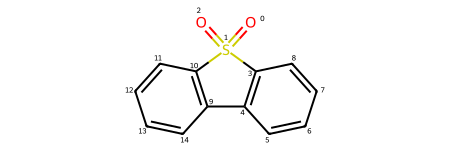

Products:


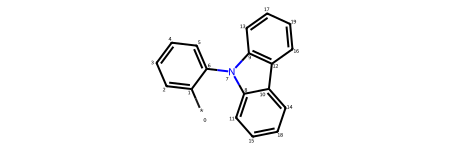

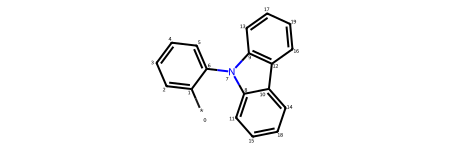

In [31]:
print("Reactant: ")
display(tricyclic_SO2_mol)
print("Products:")
for product in products_tricyclic_SO2_N_Ph_R:
    display(product[0])

In [79]:
def plot_rxn(rxn_sml, mol):
    products = run_rxn(rxn_sml, mol)
    print("Reactant: ")
    display(mol)
    print("Distinct products:")
    last_sml = ""
    for product in products:
        product_mol = product[0]
        this_sml = Chem.MolToSmiles(product_mol)
        if this_sml == last_sml:
            continue
        print(Chem.MolToSmiles(product_mol))
        display(product_mol)
        last_sml = this_sml

## Scheme 13Di bottom: Tricyclic SO2 -> P(Ph)=O

In [80]:
# tricyclic_SO2_N_P_Ph_O = "[O:6]=[S:7]=[0]>>[c:1]1[cH:2][cH:3][cH:4][cH:5][c:6]1[P:7]=[O8]"
tricyclic_SO2_N_P_Ph_O = "[O]=[S:7]=[0]>>[c]1[cH][cH][cH][cH][c]1[P:7]=[O]"


Reactant: 


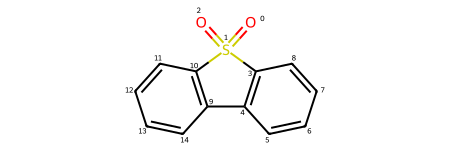

Distinct products:
O=P1(c2ccccc2)c2ccccc2-c2ccccc21


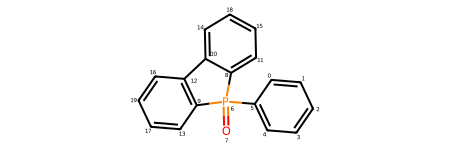

In [81]:
plot_rxn(tricyclic_SO2_N_P_Ph_O, tricyclic_SO2_mol)

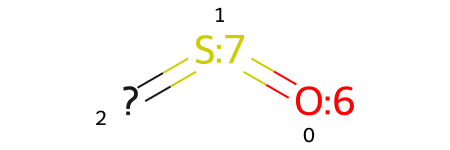

In [82]:
SO2_mol = Chem.MolFromSmarts("[O:6]=[S:7]=[0]")
SO2_mol

In [83]:
tricyclic_SO2_mol.HasSubstructMatch(SO2_mol)

True

## Scheme 13Di right: Tricyclic SO2 -> Three rings with an X

Reactant: 


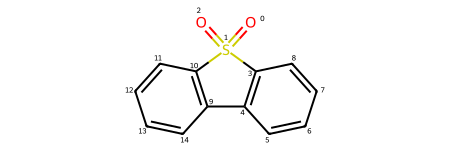

Distinct products:
C1=CC2=C(C=C1)C1(C3=C(C=CC=c3)Br2)c2ccccc2-c2ccccc21


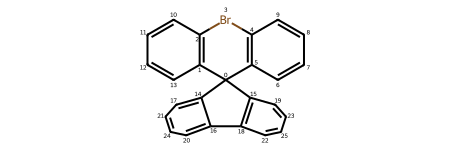

In [84]:
tricyclic_SO2_3ringsX = "[O]=[S:1]=[0]>>[C:1]1C2=C([Br][C]3=[C]1[C]=[C][C]=[C]3)[C]=[C][C]=[c]2"
plot_rxn(tricyclic_SO2_3ringsX, tricyclic_SO2_mol)

## Scheme 13Dii center: Bicyclic SO2 -> Add bicyclic ring

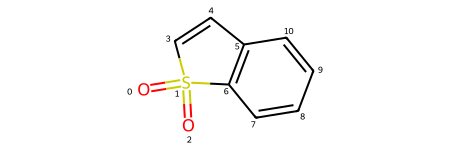

In [85]:
bicyclic_SO2 = "O=S1(=O)C=CC2=C1C=CC=C2"
bicyclic_SO2_mol = Chem.MolFromSmiles(bicyclic_SO2)
bicyclic_SO2_mol

Reactant: 


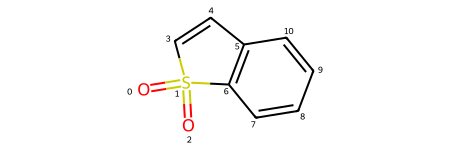

Distinct products:
O=S1(=O)C2=C(C=CC=C2)C2=C(C3=CC=CC=C3)C3=C(C=CC=C3)C(C3=CC=CC=C3)=C21


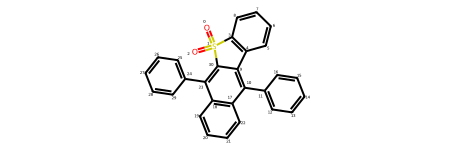

In [86]:
bicyclic_SO2_add_bicylic = "O=S1(=O)[C:1]=[C:2]c2c1cccc2>>O=S1(=O)C2=C(C=CC=C2)[C:1]2=C(C3=CC=CC=C3)C3=C(C=CC=C3)C(C3=CC=CC=C3)=[C:2]12"
plot_rxn(bicyclic_SO2_add_bicylic, bicyclic_SO2_mol)

## Scheme 13Dii right: Tetracyclic SO2 -> N-(p-tolyl)

O=S1(=O)c2ccccc2-c2c1c(-c1ccccc1)c1ccccc1c2-c1ccccc1


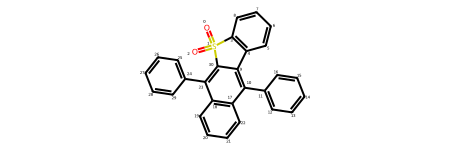

In [87]:
tetracyclic_SO2 = "O=S1(=O)C2=C(C=CC=C2)C2=C(C3=CC=CC=C3)C3=C(C=CC=C3)C(C3=CC=CC=C3)=C21"
tetracyclic_SO2_mol = Chem.MolFromSmiles(tetracyclic_SO2)
print(Chem.MolToSmiles(tetracyclic_SO2_mol))
tetracyclic_SO2_mol

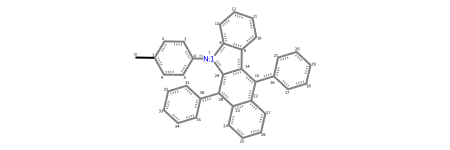

In [88]:
Chem.MolFromSmarts("C-c1ccc(cc1)[N:1]1c2c(cccc2)c2c(c3ccccc3)c3c(cccc3)c(c12)c1ccccc1")

In [89]:
Chem.MolToSmiles(Chem.MolFromSmarts("CC1=CC=C(C=C1)[N:1]1C2=C(C=CC=C2)C2=C(C3=CC=CC=C3)C3=C(C=CC=C3)C(=C12)C1=CC=CC=C1"))

'CC1=CC=C([N:1]2C3=C(C=CC=C3)C3=C(C4=CC=CC=C4)C4=C(C=CC=C4)C(C4=CC=CC=C4)=C32)C=C1'

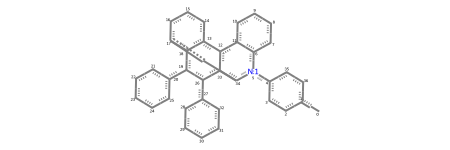

In [90]:
Chem.MolFromSmarts("Cc1ccc([n:1]2c3ccccc3c4c5cccc6c5c(c7ccccc7)c(c8ccccc8)c4c62)cc1")

Reactant: 


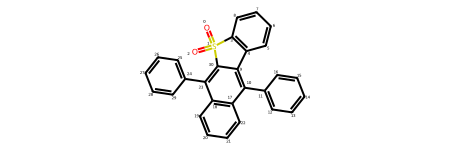

Distinct products:
Cc1ccc(N2c3ccccc3c3c2c(c2ccccc2)c2ccccc2c3c2ccccc2)cc1


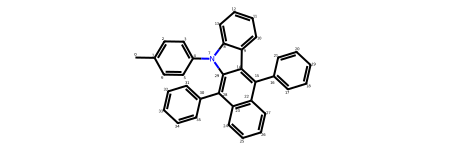

In [91]:
tetracyclic_SO2_N_p_tolyl = "O=[S:1]1(=O)c2ccccc2-c2c1c(-c1ccccc1)c1ccccc1c2-c1ccccc1>>C-c1ccc(cc1)[N:1]1c2c(cccc2)c2c(c3ccccc3)c3c(cccc3)c(c12)c1ccccc1"
plot_rxn(tetracyclic_SO2_N_p_tolyl, tetracyclic_SO2_mol)

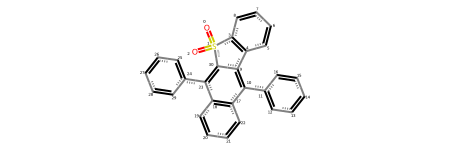

In [92]:
Chem.MolFromSmarts(tetracyclic_SO2)

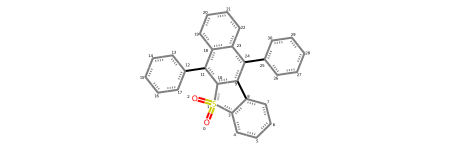

In [93]:
pattern = "O=S1(=O)c2ccccc2-c2c1c(-c1ccccc1)c1ccccc1c2-c1ccccc1"
Chem.MolFromSmarts(pattern)

In [94]:
tetracyclic_SO2_mol.HasSubstructMatch(Chem.MolFromSmarts(pattern))

True